In [2]:
!hostname

chinook04.rcs.alaska.edu


In [3]:
import xarray as xr
import os
import glob
import geopandas as gpd
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import regionmask
import matplotlib.pyplot as plt

In [4]:
shapefile_path = "/center1/DYNDOWN/phutton5/ROS/boundaries/Alaska_Borough_and_Census_Area_Boundaries.shp"
borough_boundaries = gpd.read_file(shapefile_path)
borough_boundaries = borough_boundaries.set_crs(epsg=3338)
borough_boundaries = borough_boundaries.to_crs(epsg=4326)
FNSB_boundary = borough_boundaries[borough_boundaries['CommunityN'] == 'Fairbanks North Star Borough']
FNSB_geom = FNSB_boundary.geometry.iloc[0] 
FNSB_coords = []
FNSB_coords.extend(list(FNSB_geom.exterior.coords))
FNSB_coords = np.array(FNSB_coords)  
FNSB_coords = pd.DataFrame({
    "lon": FNSB_coords[:, 0],
    "lat": FNSB_coords[:, 1]
})

Fairbanks_lat=(64.84)
Fairbanks_lon=(-147.72)

Mun_of_Anc_boundary = borough_boundaries[borough_boundaries['CommunityN'] == 'Municipality of Anchorage']
Bethel_boundary = borough_boundaries[borough_boundaries['CommunityN'] == 'Bethel Census Area']
Mat_Su_boundary=borough_boundaries[borough_boundaries['CommunityN'] == 'Matanuska-Susitna Borough']

Denali_boundary=borough_boundaries[borough_boundaries['CommunityN'] == 'Denali Borough']


In [5]:
Bilinear_regridded_ERA5_4km=xr.open_dataset('/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files/BILINEAR_REGRIDDED_ERA5_4km_ROS.nc', engine='netcdf4')
Bilinear_regridded_ERA5_4km=Bilinear_regridded_ERA5_4km.transpose("latitude", "longitude",...)
ROS_Tally_Bilinear_regridded_ERA5_4km=np.sum(Bilinear_regridded_ERA5_4km['ros_tally'],axis=(3))
ROS_Tally_Bilinear_regridded_ERA5_4km=np.mean(ROS_Tally_Bilinear_regridded_ERA5_4km,axis=(2))
ROS_Tally_Bilinear_regridded_ERA5_4km=ROS_Tally_Bilinear_regridded_ERA5_4km.fillna(0)

ROS_RAIN_SUM_Bilinear_regridded_ERA5_4km=np.sum(Bilinear_regridded_ERA5_4km['rain_ros_sum'],axis=(3))
ROS_RAIN_SUM_Bilinear_regridded_ERA5_4km=np.mean(ROS_RAIN_SUM_Bilinear_regridded_ERA5_4km,axis=(2))
ROS_RAIN_SUM_Bilinear_regridded_ERA5_4km=ROS_RAIN_SUM_Bilinear_regridded_ERA5_4km.fillna(0)


lat=Bilinear_regridded_ERA5_4km['latitude']
lon=Bilinear_regridded_ERA5_4km['longitude']

#normalized_ERA5_4km=xr.open_dataset('/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files/ros_stats_per_borough_4km.nc', engine='netcdf4')
#regridded_normalized_ERA5_4km=xr.open_dataset('/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files/REGRIDDED_ros_stats_per_borough.nc', engine='netcdf4')

NEAREST_REGRIDDED_ERA5_4km=xr.open_dataset('/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files/NEAREST_REGRIDDED_ERA5_4km_ROS.nc', engine='netcdf4')
NEAREST_REGRIDDED_ERA5_4km=NEAREST_REGRIDDED_ERA5_4km.transpose("latitude", "longitude",...)
ROS_Tally_nearest_regridded_ERA5_4km=np.sum(NEAREST_REGRIDDED_ERA5_4km['ros_tally'],axis=(3))
ROS_Tally_nearest_regridded_ERA5_4km=np.mean(ROS_Tally_nearest_regridded_ERA5_4km,axis=(2))
ROS_Tally_nearest_regridded_ERA5_4km=ROS_Tally_nearest_regridded_ERA5_4km.fillna(0)

ROS_RAIN_SUM_nearest_regridded_ERA5_4km=np.sum(NEAREST_REGRIDDED_ERA5_4km['rain_ros_sum'],axis=(3))
ROS_RAIN_SUM_nearest_regridded_ERA5_4km=np.mean(ROS_RAIN_SUM_nearest_regridded_ERA5_4km,axis=(2))
ROS_RAIN_SUM_nearest_regridded_ERA5_4km=ROS_RAIN_SUM_nearest_regridded_ERA5_4km.fillna(0)


path='/center1/DYNDOWN/phutton5/ROS/Raw_ERA5/Raw_ERA5_netcdf'
pattern=f'Raw_ERA5_ROS_*.nc'
file_list = sorted(glob.glob(os.path.join(path, pattern)))
era5_31km = xr.open_mfdataset(file_list, combine='by_coords',engine='netcdf4')
seasons=era5_31km['season']
era531kmlat=era5_31km['latitude']
era531kmlon=era5_31km['longitude']

ROS_Tally_era5_31km=np.sum(era5_31km['ros_tally'],axis=(1))
ROS_Tally_era5_31km=np.mean(ROS_Tally_era5_31km,axis=(0))
ROS_Tally_era5_31km=ROS_Tally_era5_31km.fillna(0)

ROS_rain_sum_era5_31km=np.sum(era5_31km['rain_ros_sum'],axis=(1))
ROS_rain_sum_era5_31km=np.mean(ROS_rain_sum_era5_31km,axis=(0))
ROS_rain_sum_era5_31km=ROS_rain_sum_era5_31km.fillna(0)

In [6]:
path='/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files/'
compare=f'ROS_Monthly_*.nc'
file_list = sorted(glob.glob(os.path.join(path, compare)))
combined_ds=xr.open_mfdataset(file_list, combine='by_coords',engine='netcdf4')

os.chdir("/import/beegfs/CMIP6/wrf_era5")
geo_em_path = "geo_em.d02.nc"
geo = xr.open_dataset(geo_em_path)
oceanmask=geo['LU_INDEX']
oceanmask=oceanmask.squeeze(dim='Time')
#oceanmask_expanded = oceanmask.expand_dims(Time=data.Time)

combined_ds = combined_ds.where(oceanmask != 17)
era5_4km=combined_ds

era54kmlat = combined_ds['XLAT'].values
era54kmlon = combined_ds['XLONG'].values


In [7]:
ROS_Tally_era5_4km=np.sum(era5_4km['ros_tally'],axis=1)
ROS_Tally_era5_4km=np.mean(ROS_Tally_era5_4km,axis=0)

In [8]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
cmap = plt.get_cmap('Blues')
levels=np.linspace(0,100,200)
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=cmap.N, extend='max')

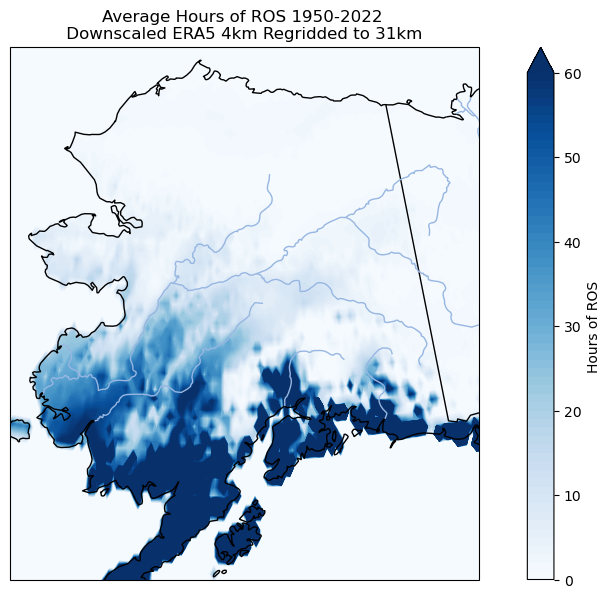

In [9]:
fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10,6))
cf = ax.contourf(lon, lat,ROS_Tally_nearest_regridded_ERA5_4km, cmap=cmap,levels=np.arange(0,61,1), extend='max',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='Hours of ROS', ticks=np.arange(0,70,10))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

#FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())
#ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=10, s=75,label='Fairbanks', transform=ccrs.PlateCarree())
#ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks',
#        transform=ccrs.PlateCarree(), ha='center', va='bottom',
#        fontsize=8, zorder=10, fontweight='bold', color='black')
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_title("Average Hours of ROS 1950-2022 \n Downscaled ERA5 4km Regridded to 31km ")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

fig.patch.set_alpha(0.0)
plt.tight_layout()
plt.show() 

In [10]:
difference=ROS_Tally_nearest_regridded_ERA5_4km-ROS_Tally_era5_31km

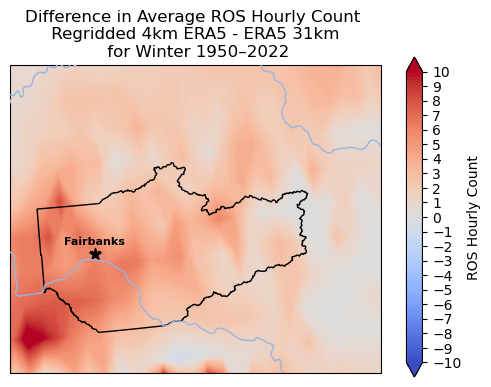

In [28]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
levels = np.linspace(-10,10,100)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
fig.patch.set_alpha(0)
ax.set_facecolor('none')
cf = ax.contourf(lon, lat, difference, levels=levels,extend='both',cmap='coolwarm',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='ROS Hourly Count')
cbar.set_ticks(np.arange(-10,11,1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])
FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)
ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks', transform=ccrs.PlateCarree(),
        ha='center', va='bottom', fontsize=8, zorder=6, fontweight='bold', color='black')

ax.set_title("Difference in Average ROS Hourly Count \n Regridded 4km ERA5 - ERA5 31km \n for Winter 1950–2022")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree()) 
ax.set_aspect('equal') 
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

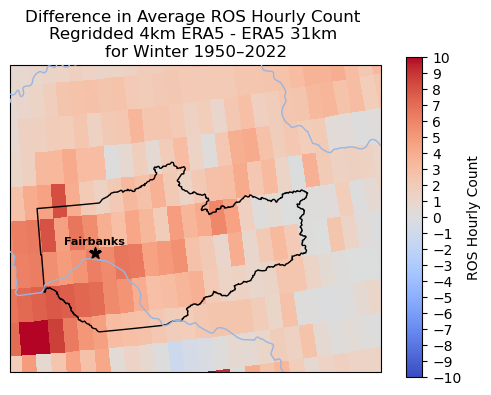

In [9]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
fig.patch.set_alpha(0)
ax.set_facecolor('none')
pcm = ax.pcolormesh(
    lon, lat, difference,
    cmap='coolwarm',
    vmin=-10, vmax=10,
    shading='auto',
    transform=ccrs.PlateCarree())

cbar = fig.colorbar(pcm, ax=ax, label='ROS Hourly Count')
cbar.set_ticks(np.arange(-10, 11, 1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())
ax.scatter(
    Fairbanks_lon, Fairbanks_lat,
    marker='*', color='k',
    zorder=5, s=75,
    label='Fairbanks',
    transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.text(
    Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks',
    transform=ccrs.PlateCarree(),
    ha='center', va='bottom',
    fontsize=8, zorder=6,
    fontweight='bold', color='black')

ax.set_title(
    "Difference in Average ROS Hourly Count \n"
    "Regridded 4km ERA5 - ERA5 31km \n"
    "for Winter 1950–2022")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

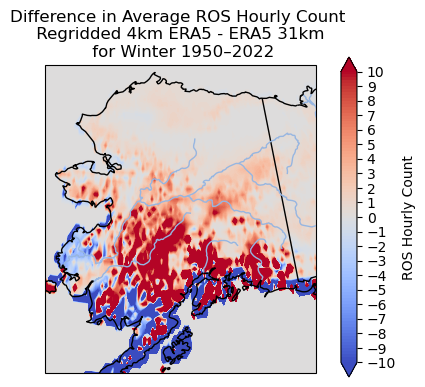

In [10]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,standard_parallels=(55, 65))}
levels = np.linspace(-10,10,100)

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
fig.patch.set_alpha(0)
ax.set_facecolor('none')
cf = ax.contourf(lon, lat, difference, levels=levels,extend='both',cmap='coolwarm',transform=ccrs.PlateCarree())
cbar = fig.colorbar(cf, ax=ax, label='ROS Hourly Count')
cbar.set_ticks(np.arange(-10,11,1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])
#FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',linewidth=1,zorder=2,transform=ccrs.PlateCarree())
#ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)
#ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks', transform=ccrs.PlateCarree(),
#        ha='center', va='bottom', fontsize=8, zorder=6, fontweight='bold', color='black')

ax.set_title("Difference in Average ROS Hourly Count \n Regridded 4km ERA5 - ERA5 31km \n for Winter 1950–2022")
ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal') 
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


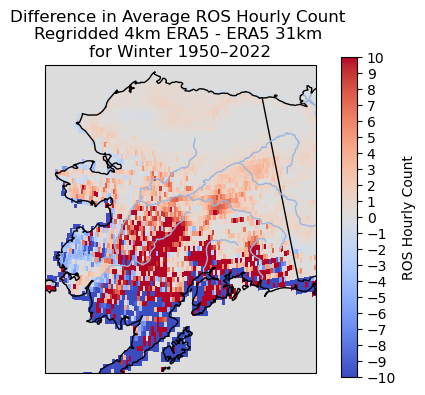

In [11]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))

# Make background transparent
fig.patch.set_alpha(0)
ax.set_facecolor('none')

pcm = ax.pcolormesh(
    lon, lat, difference,
    cmap='coolwarm',
    vmin=-10, vmax=10,
    shading='auto',
    transform=ccrs.PlateCarree()
)

cbar = fig.colorbar(pcm, ax=ax, label='ROS Hourly Count')
cbar.set_ticks(np.arange(-10, 11, 1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

# Map features
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title(
    "Difference in Average ROS Hourly Count \n"
    "Regridded 4km ERA5 - ERA5 31km \n"
    "for Winter 1950–2022"
)

ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


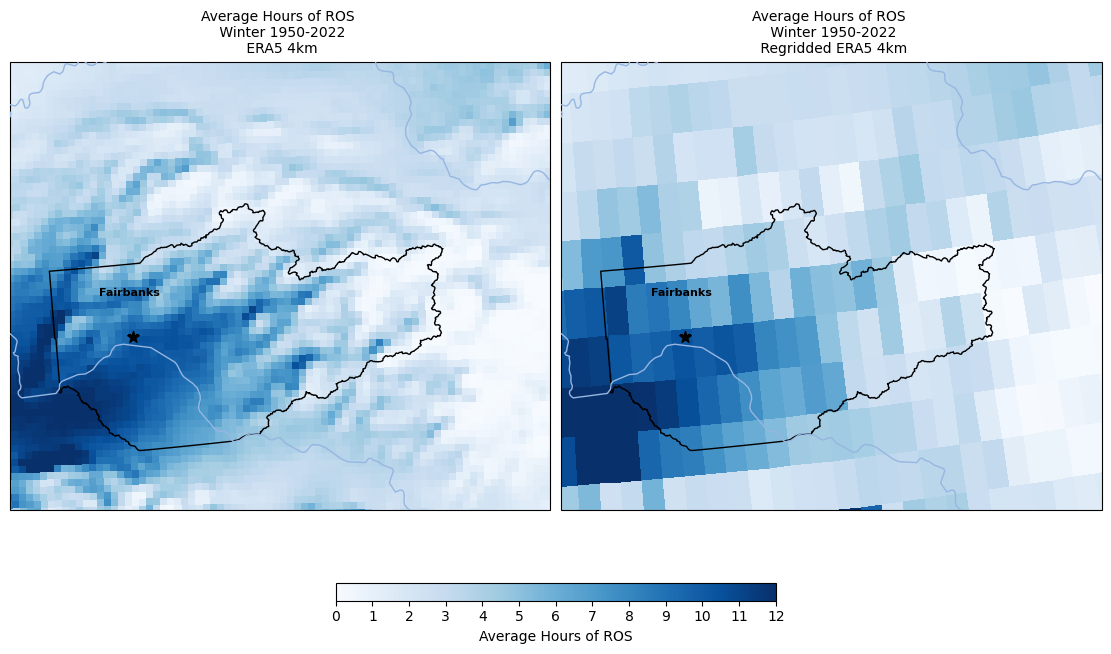

In [12]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

# Create color map and levels
cmap = 'Blues'
levels=np.linspace(0,12,50)

# Use pcolormesh instead of contourf
pc1 = axs[0].pcolormesh(ROS_Tally_era5_4km['XLONG'], ROS_Tally_era5_4km['XLAT'], 
                        ROS_Tally_era5_4km, 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 4km", fontsize=10)

# Use pcolormesh for ERA5 31km data
pc2 = axs[1].pcolormesh(ROS_Tally_Bilinear_regridded_ERA5_4km['longitude'], ROS_Tally_Bilinear_regridded_ERA5_4km['latitude'], 
                        ROS_Tally_Bilinear_regridded_ERA5_4km, 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n Winter 1950-2022\n Regridded ERA5 4km", fontsize=10)

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 13, 1))

fig.patch.set_alpha(0.0)
plt.show()


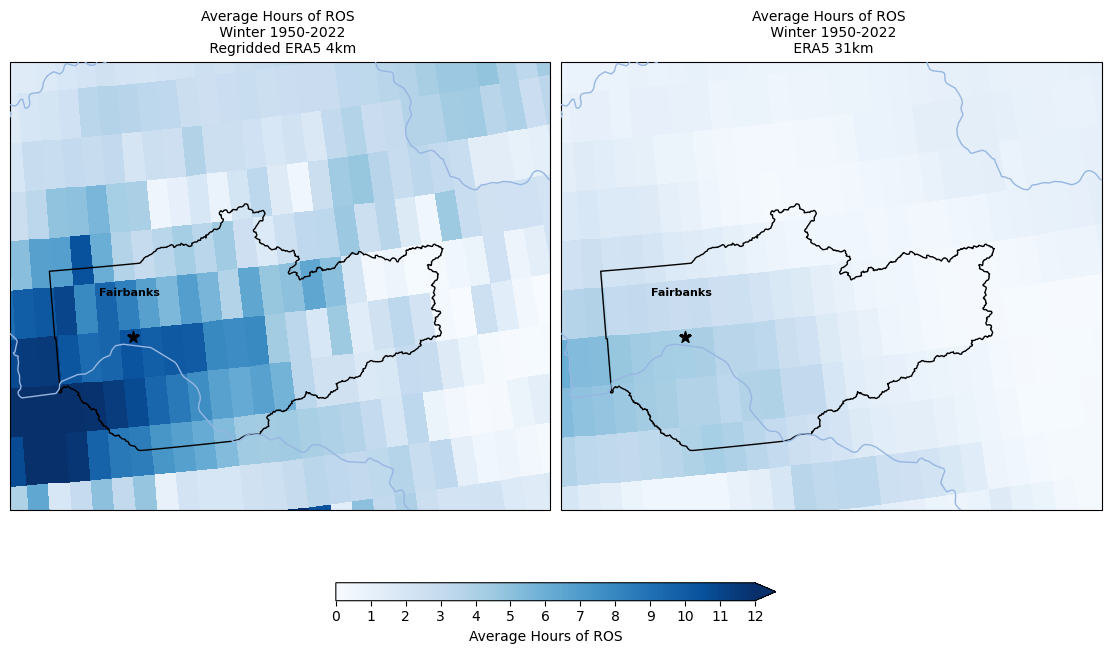

In [14]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

# Create color map and levels
cmap = 'Blues'
levels=np.linspace(0,12,50)

# Use pcolormesh instead of contourf
pc1 = axs[0].pcolormesh(ROS_Tally_nearest_regridded_ERA5_4km['longitude'], ROS_Tally_nearest_regridded_ERA5_4km['latitude'], 
                        ROS_Tally_nearest_regridded_ERA5_4km, 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n Winter 1950-2022\n Regridded ERA5 4km", fontsize=10)

# Use pcolormesh for ERA5 31km data
pc2 = axs[1].pcolormesh(ROS_Tally_era5_31km['longitude'], ROS_Tally_era5_31km['latitude'], 
                        ROS_Tally_era5_31km, 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 31km", fontsize=10)

for ax in axs:
    FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())
    ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
            fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(pc1,extend='max', cax=cbar_ax, orientation='horizontal', label='Average Hours of ROS', ticks=np.arange(0, 13, 1))

fig.patch.set_alpha(0.0)
plt.show()


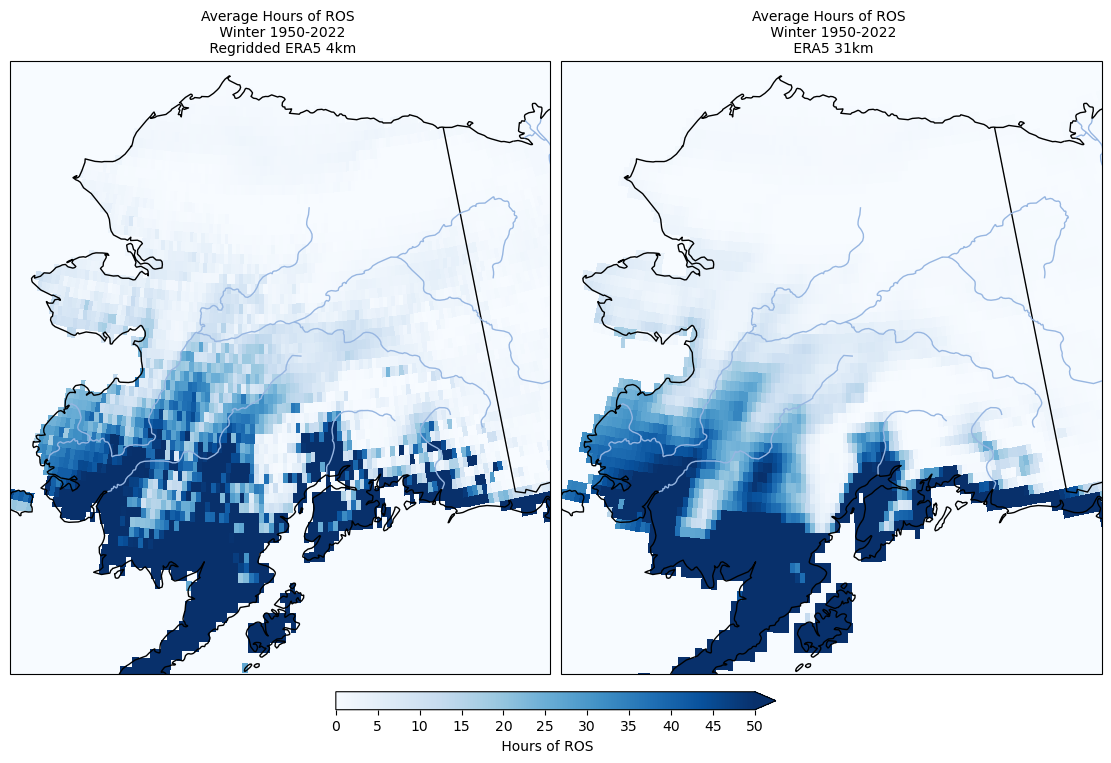

In [12]:

AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

# Create color map and levels
cmap = 'Blues'
levels=np.linspace(0,50,100)

# Use pcolormesh instead of contourf
pc1 = axs[0].pcolormesh(ROS_Tally_nearest_regridded_ERA5_4km['longitude'], ROS_Tally_nearest_regridded_ERA5_4km['latitude'], 
                        ROS_Tally_nearest_regridded_ERA5_4km, 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Hours of ROS \n Winter 1950-2022\n Regridded ERA5 4km", fontsize=10)

# Use pcolormesh for ERA5 31km data
pc2 = axs[1].pcolormesh(ROS_Tally_era5_31km['longitude'], ROS_Tally_era5_31km['latitude'], 
                        ROS_Tally_era5_31km, 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[1].set_title("Average Hours of ROS \n Winter 1950-2022\n ERA5 31km", fontsize=10)

for ax in axs:
    #FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.12, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, extend='max',orientation='horizontal', label=' Hours of ROS', ticks=np.arange(0, 51, 1)[::5])

fig.patch.set_alpha(0.0)
plt.show()

In [33]:
#Rain ros sum 
#ROS_RAIN_SUM_nearest_regridded_ERA5_4km
#ROS_RAIN_SUM_Bilinear_regridded_ERA5_4km

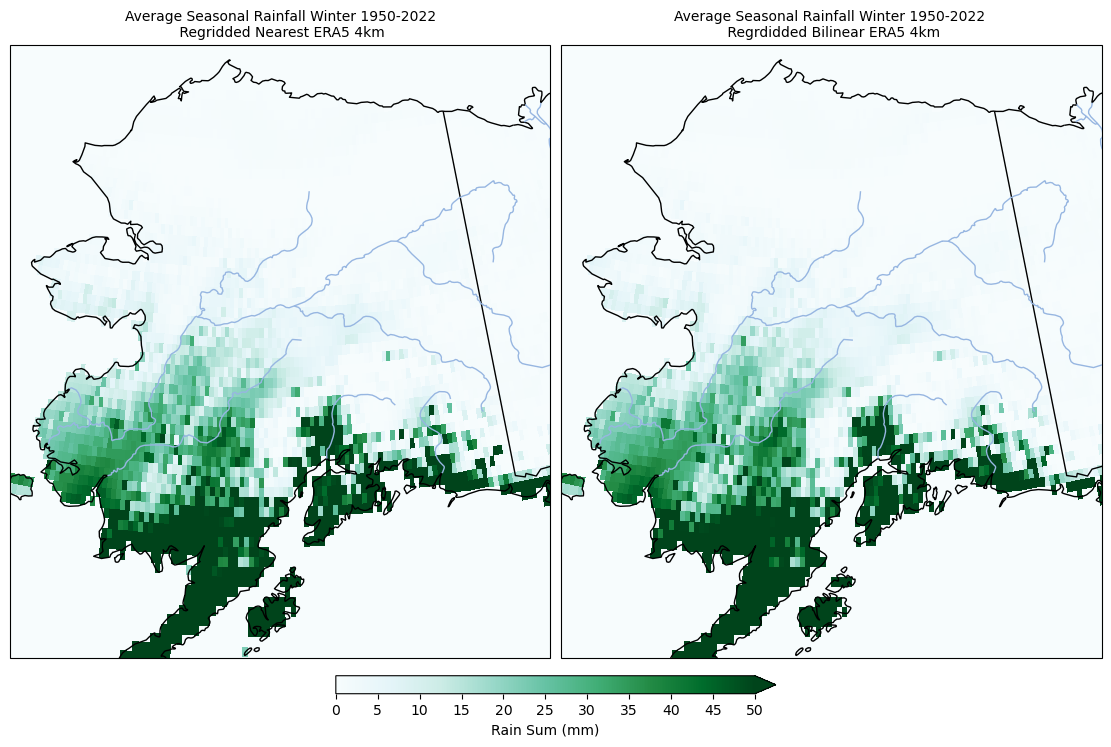

In [13]:

AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

# Create color map and levels
cmap = 'BuGn'
levels=np.linspace(0,50,100)

# Use pcolormesh instead of contourf
pc1 = axs[0].pcolormesh(ROS_RAIN_SUM_nearest_regridded_ERA5_4km['longitude'], ROS_RAIN_SUM_nearest_regridded_ERA5_4km['latitude'], 
                        ROS_RAIN_SUM_nearest_regridded_ERA5_4km, 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Seasonal Rainfall Winter 1950-2022\n Regridded Nearest ERA5 4km", fontsize=10)

# Use pcolormesh for ERA5 31km data
pc2 = axs[1].pcolormesh(ROS_RAIN_SUM_Bilinear_regridded_ERA5_4km['longitude'], ROS_RAIN_SUM_Bilinear_regridded_ERA5_4km['latitude'], 
                        ROS_RAIN_SUM_Bilinear_regridded_ERA5_4km, 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())
#average seasonal sum of rainfall during ROS events 
#Average Seasonal Rainfall from Winter 1950-2022 
axs[1].set_title("Average Seasonal Rainfall Winter 1950-2022 \n Regrdidded Bilinear ERA5 4km", fontsize=10)

for ax in axs:
    #FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.12, 0.4, 0.02])
fig.colorbar(pc1,extend='max', cax=cbar_ax, orientation='horizontal', label='Rain Sum (mm)', ticks=np.arange(0, 51, 1)[::5])

fig.patch.set_alpha(0.0)
plt.show()

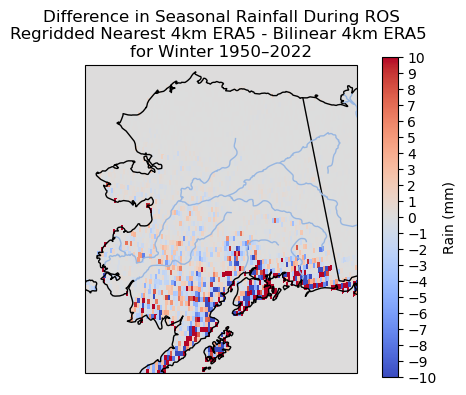

In [23]:
Rain_difference=(ROS_RAIN_SUM_nearest_regridded_ERA5_4km-ROS_RAIN_SUM_Bilinear_regridded_ERA5_4km)

AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))

# Make background transparent
fig.patch.set_alpha(0)
ax.set_facecolor('none')

pcm = ax.pcolormesh(
    lon, lat, Rain_difference,
    cmap='coolwarm',
    vmin=-10, vmax=10,
    shading='auto',
    transform=ccrs.PlateCarree()
)

cbar = fig.colorbar(pcm, ax=ax, label='Rain (mm)')
cbar.set_ticks(np.arange(-10, 11, 1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

# Map features
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title(
    "Difference in Seasonal Rainfall During ROS\n"
    "Regridded Nearest 4km ERA5 - Bilinear 4km ERA5 \n"
    "for Winter 1950–2022"
)

ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


In [1]:

AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154, central_latitude=50,
        standard_parallels=(55, 65))}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11,9), subplot_kw=AK_ALBERS_SUBPLOT_KW, constrained_layout=True)

# Create color map and levels
cmap = 'BuGn'
levels=np.linspace(0,50,100)

# Use pcolormesh instead of contourf
pc1 = axs[0].pcolormesh(ROS_RAIN_SUM_nearest_regridded_ERA5_4km['longitude'], ROS_RAIN_SUM_nearest_regridded_ERA5_4km['latitude'], 
                        ROS_RAIN_SUM_nearest_regridded_ERA5_4km, 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())

axs[0].set_title("Average Seasonal Rainfall\n Winter 1950-2022\n Regridded ERA5 4km", fontsize=10)

# Use pcolormesh for ERA5 31km data
pc2 = axs[1].pcolormesh(ROS_rain_sum_era5_31km['longitude'], ROS_rain_sum_era5_31km['latitude'], 
                        ROS_rain_sum_era5_31km, 
                        cmap=cmap, 
                        vmin=levels[0], vmax=levels[-1], 
                        shading='auto', transform=ccrs.PlateCarree())
#average seasonal sum of rainfall during ROS events 
#Average Seasonal Rainfall from Winter 1950-2022 
axs[1].set_title("Average Seasonal Rainfall \nWinter 1950-2022 \n ERA5 31km", fontsize=10)

for ax in axs:
    #FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())
    #ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k', s=75, zorder=9, transform=ccrs.PlateCarree())
    #ax.text(Fairbanks_lon, Fairbanks_lat + 0.2, 'Fairbanks', ha='center', va='bottom', fontsize=8,
    #        fontweight='bold', color='black', zorder=6, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    ax.set_aspect('equal')

cbar_ax = fig.add_axes([0.3, 0.12, 0.4, 0.02])
fig.colorbar(pc1, cax=cbar_ax, extend='max',orientation='horizontal', label='Rain Sum (mm)', ticks=np.arange(0, 51, 1)[::5])

fig.patch.set_alpha(0.0)
plt.show()

NameError: name 'ccrs' is not defined

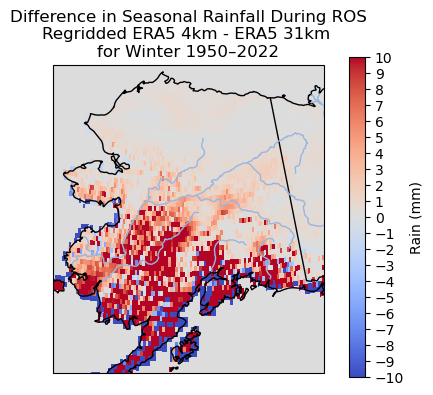

In [26]:
Rain_difference=(ROS_RAIN_SUM_nearest_regridded_ERA5_4km-ROS_rain_sum_era5_31km)

AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))

# Make background transparent
fig.patch.set_alpha(0)
ax.set_facecolor('none')

pcm = ax.pcolormesh(
    lon, lat, Rain_difference,
    cmap='coolwarm',
    vmin=-10, vmax=10,
    shading='auto',
    transform=ccrs.PlateCarree()
)

cbar = fig.colorbar(pcm, ax=ax, label='Rain (mm)')
cbar.set_ticks(np.arange(-10, 11, 1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

# Map features
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title(
    "Difference in Seasonal Rainfall During ROS\n"
    "Regridded ERA5 4km - ERA5 31km \n"
    "for Winter 1950–2022"
)

ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

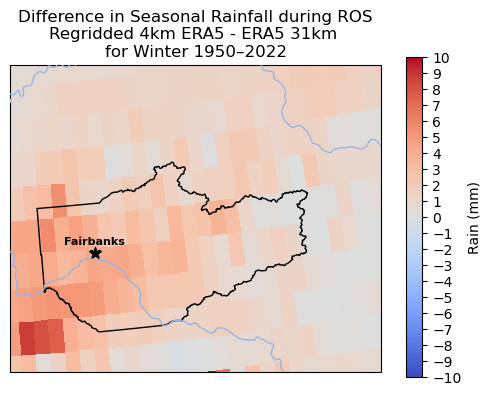

In [28]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
fig.patch.set_alpha(0)
ax.set_facecolor('none')
pcm = ax.pcolormesh(
    lon, lat, Rain_difference,
    cmap='coolwarm',
    vmin=-10, vmax=10,
    shading='auto',
    transform=ccrs.PlateCarree())

cbar = fig.colorbar(pcm, ax=ax, label='Rain (mm)')
cbar.set_ticks(np.arange(-10, 11, 1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())
ax.scatter(
    Fairbanks_lon, Fairbanks_lat,
    marker='*', color='k',
    zorder=5, s=75,
    label='Fairbanks',
    transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.text(
    Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks',
    transform=ccrs.PlateCarree(),
    ha='center', va='bottom',
    fontsize=8, zorder=6,
    fontweight='bold', color='black')

ax.set_title(
    "Difference in Seasonal Rainfall during ROS\n"
    "Regridded 4km ERA5 - ERA5 31km \n"
    "for Winter 1950–2022")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

BETHEL
-

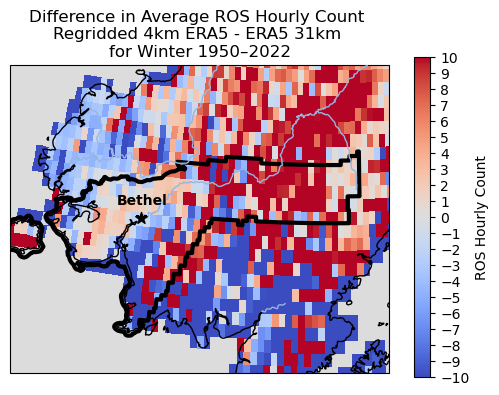

In [12]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(
       central_longitude=-154,
       central_latitude=50,
       standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
fig.patch.set_alpha(0)
ax.set_facecolor('none')
pcm = ax.pcolormesh(lon, lat, difference,
   cmap='coolwarm',
   vmin=-10, vmax=10,
   shading='auto',
   transform=ccrs.PlateCarree())

cbar = fig.colorbar(pcm, ax=ax, label='ROS Hourly Count')
cbar.set_ticks(np.arange(-10, 11, 1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

Bethel_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3, zorder=2, transform=ccrs.PlateCarree())
Bethel_lon = -161.7554
Bethel_lat = 60.7913
ax.scatter(Bethel_lon, Bethel_lat, marker='*', color='black', s=75, zorder=12, transform=ccrs.PlateCarree())
ax.text(Bethel_lon, Bethel_lat + 0.2, 'Bethel', ha='center', va='bottom', fontsize=10,
       fontweight='bold', color='black', zorder=12, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title(
   "Difference in Average ROS Hourly Count \n"
   "Regridded 4km ERA5 - ERA5 31km \n"
   "for Winter 1950–2022")
ax.set_extent([-166.0, -152.0, 58.0, 63.5], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


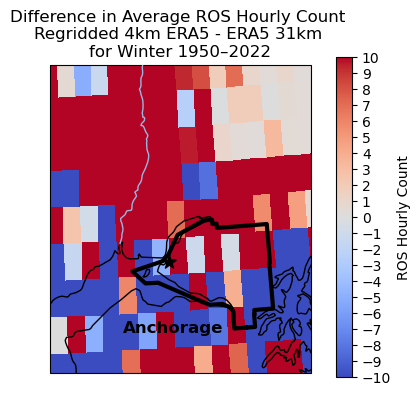

In [17]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(
       central_longitude=-154,
       central_latitude=50,
       standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
fig.patch.set_alpha(0)
ax.set_facecolor('none')
pcm = ax.pcolormesh(lon, lat, difference,
   cmap='coolwarm',
   vmin=-10, vmax=10,
   shading='auto',
   transform=ccrs.PlateCarree())

cbar = fig.colorbar(pcm, ax=ax, label='ROS Hourly Count')
cbar.set_ticks(np.arange(-10, 11, 1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

Mun_of_Anc_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3, zorder=2, transform=ccrs.PlateCarree())
Anchorage_lon = -149.9003
Anchorage_lat = 61.2181
ax.scatter(Anchorage_lon, Anchorage_lat, marker='*', color='black', s=100,zorder=9, transform=ccrs.PlateCarree())
ax.text(Anchorage_lon, Anchorage_lat - 0.5, 'Anchorage', ha='center', va='bottom', fontsize=12,
       fontweight='bold', color='black', zorder=10, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title(
   "Difference in Average ROS Hourly Count \n"
   "Regridded 4km ERA5 - ERA5 31km \n"
   "for Winter 1950–2022")
ax.set_extent([-151.5, -148, 60.5, 62.5], crs=ccrs.PlateCarree()) 
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()





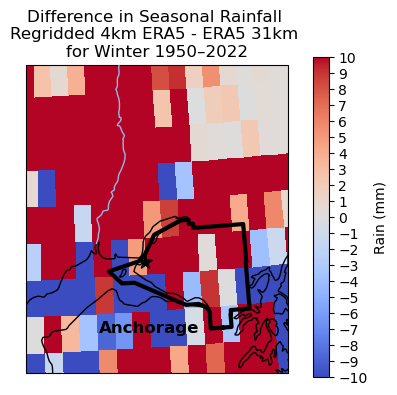

In [31]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(
       central_longitude=-154,
       central_latitude=50,
       standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
fig.patch.set_alpha(0)
ax.set_facecolor('none')
pcm = ax.pcolormesh(lon, lat, Rain_difference,
   cmap='coolwarm',
   vmin=-10, vmax=10,
   shading='auto',
   transform=ccrs.PlateCarree())

cbar = fig.colorbar(pcm, ax=ax, label='Rain (mm)')
cbar.set_ticks(np.arange(-10, 11, 1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

Mun_of_Anc_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3, zorder=2, transform=ccrs.PlateCarree())
Anchorage_lon = -149.9003
Anchorage_lat = 61.2181
ax.scatter(Anchorage_lon, Anchorage_lat, marker='*', color='black', s=100,zorder=9, transform=ccrs.PlateCarree())
ax.text(Anchorage_lon, Anchorage_lat - 0.5, 'Anchorage', ha='center', va='bottom', fontsize=12,
       fontweight='bold', color='black', zorder=10, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title(
   "Difference in Seasonal Rainfall \n"
   "Regridded 4km ERA5 - ERA5 31km \n"
   "for Winter 1950–2022")
ax.set_extent([-151.5, -148, 60.5, 62.5], crs=ccrs.PlateCarree()) 
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


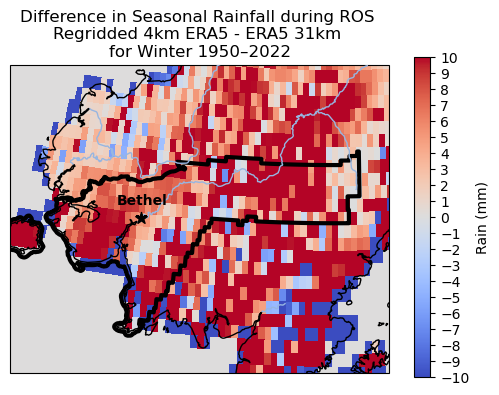

In [32]:
AK_ALBERS_SUBPLOT_KW = {'projection': ccrs.AlbersEqualArea(
       central_longitude=-154,
       central_latitude=50,
       standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
fig.patch.set_alpha(0)
ax.set_facecolor('none')
pcm = ax.pcolormesh(lon, lat,Rain_difference,
   cmap='coolwarm',
   vmin=-10, vmax=10,
   shading='auto',
   transform=ccrs.PlateCarree())

cbar = fig.colorbar(pcm, ax=ax, label='Rain (mm)')
cbar.set_ticks(np.arange(-10, 11, 1))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

Bethel_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=3, zorder=2, transform=ccrs.PlateCarree())
Bethel_lon = -161.7554
Bethel_lat = 60.7913
ax.scatter(Bethel_lon, Bethel_lat, marker='*', color='black', s=75, zorder=12, transform=ccrs.PlateCarree())
ax.text(Bethel_lon, Bethel_lat + 0.2, 'Bethel', ha='center', va='bottom', fontsize=10,
       fontweight='bold', color='black', zorder=12, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title(
   "Difference in Seasonal Rainfall during ROS \n"
   "Regridded 4km ERA5 - ERA5 31km \n"
   "for Winter 1950–2022")
ax.set_extent([-166.0, -152.0, 58.0, 63.5], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()
